In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("/content/water_potability.csv")
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [3]:
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [6]:
data['ph']=data['ph'].fillna(data['ph'].mean())
data['Sulfate']=data['Sulfate'].fillna(data['Sulfate'].mean())
data['Trihalomethanes']=data['Trihalomethanes'].fillna(data['Trihalomethanes'].mean())

In [7]:
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


#1==potable(drinking water)
#0==not potable(not drinking water)


In [8]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [9]:
data.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075833,-0.081884,-0.031811,0.014403,0.017192,0.040061,0.002994,-0.036222,-0.003287
Hardness,0.075833,1.000000,-0.046899,-0.030054,-0.092766,-0.023915,0.003610,-0.012690,-0.014449,-0.013837
Solids,-0.081884,-0.046899,1.000000,-0.070148,-0.149840,0.013831,0.010242,-0.008875,0.019546,0.033743
Chloramines,-0.031811,-0.030054,-0.070148,1.000000,0.023791,-0.020486,-0.012653,0.016627,0.002363,0.023779
Sulfate,0.014403,-0.092766,-0.149840,0.023791,1.000000,-0.014059,0.026909,-0.025605,-0.009790,-0.020619
Conductivity,0.017192,-0.023915,0.013831,-0.020486,-0.014059,1.000000,0.020966,0.001255,0.005798,-0.008128
Organic_carbon,0.040061,0.003610,0.010242,-0.012653,0.026909,0.020966,1.000000,-0.012976,-0.027308,-0.030001
Trihalomethanes,0.002994,-0.012690,-0.008875,0.016627,-0.025605,0.001255,-0.012976,1.000000,-0.021502,0.006960
Turbidity,-0.036222,-0.014449,0.019546,0.002363,-0.009790,0.005798,-0.027308,-0.021502,1.000000,0.001581
Potability,-0.003287,-0.013837,0.033743,0.023779,-0.020619,-0.008128,-0.030001,0.006960,0.001581,1.000000


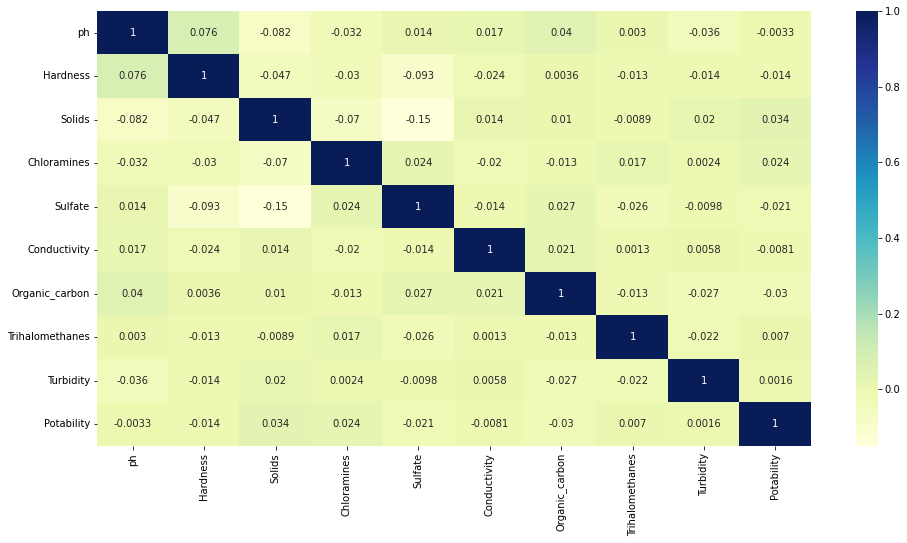

In [10]:
import seaborn as sns
plt.figure(figsize=(16,8))
sns.heatmap(data.corr(),cmap="YlGnBu",annot=True)

In [11]:
data.corr()['Potability'].sort_values(ascending=False)

Potability         1.000000
Solids             0.033743
Chloramines        0.023779
Trihalomethanes    0.006960
Turbidity          0.001581
ph                -0.003287
Conductivity      -0.008128
Hardness          -0.013837
Sulfate           -0.020619
Organic_carbon    -0.030001
Name: Potability, dtype: float64

In [12]:
data=data.drop(data[['Turbidity','Trihalomethanes','ph','Conductivity']],axis=1)

In [13]:
data.columns

Index(['Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Organic_carbon',
       'Potability'],
      dtype='object')

In [14]:
data

,Hardness,Solids,Chloramines,Sulfate,Organic_carbon,Potability
0,204.890455,20791.318981,7.300212,368.516441,10.379783,0
1,129.422921,18630.057858,6.635246,333.775777,15.180013,0
2,224.236259,19909.541732,9.275884,333.775777,16.868637,0
3,214.373394,22018.417441,8.059332,356.886136,18.436524,0
4,181.101509,17978.986339,6.546600,310.135738,11.558279,0
...,...,...,...,...,...,...
3271,193.681735,47580.991603,7.166639,359.948574,13.894419,1
3272,193.553212,17329.802160,8.061362,333.775777,19.903225,1
3273,175.762646,33155.578218,7.350233,333.775777,11.039070,1
3274,230.603758,11983.869376,6.303357,333.775777,11.168946,1


In [15]:
x=data.iloc[:,:-1]

In [16]:
x.columns

Index(['Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Organic_carbon'], dtype='object')

In [17]:
x

,Hardness,Solids,Chloramines,Sulfate,Organic_carbon
0,204.890455,20791.318981,7.300212,368.516441,10.379783
1,129.422921,18630.057858,6.635246,333.775777,15.180013
2,224.236259,19909.541732,9.275884,333.775777,16.868637
3,214.373394,22018.417441,8.059332,356.886136,18.436524
4,181.101509,17978.986339,6.546600,310.135738,11.558279
...,...,...,...,...,...
3271,193.681735,47580.991603,7.166639,359.948574,13.894419
3272,193.553212,17329.802160,8.061362,333.775777,19.903225
3273,175.762646,33155.578218,7.350233,333.775777,11.039070
3274,230.603758,11983.869376,6.303357,333.775777,11.168946


In [18]:
y=data.iloc[:,-1]

In [19]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2) 

In [21]:
#knn
import sklearn
from sklearn.neighbors import KNeighborsClassifier 

In [22]:
#finding and fitting best k value
for i in range(1,11):
   knn=KNeighborsClassifier(n_neighbors=i)
   knn.fit(x_train,y_train)
   print(i,knn.score(x_test,y_test))

1 0.5228658536585366
2 0.5929878048780488
3 0.5442073170731707
4 0.5792682926829268
5 0.5503048780487805
6 0.586890243902439
7 0.5655487804878049
8 0.6097560975609756
9 0.5990853658536586
10 0.6280487804878049


In [23]:
#svm
from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc.fit(x_train,y_train)
svc.score(x_test,y_test)

0.6280487804878049

In [24]:
#svm
from sklearn.svm import SVC
svc=SVC(kernel='poly',degree=8)
svc.fit(x_train,y_train)
svc.score(x_test,y_test)

0.6310975609756098

In [25]:
#svm
from sklearn.svm import SVC
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_test,y_test)

0.6295731707317073

In [26]:
#svm
from sklearn.svm import SVC
svc=SVC(kernel='sigmoid')
svc.fit(x_train,y_train)
svc.score(x_test,y_test)

0.5030487804878049

In [27]:
#logistic
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train,y_train)
lg.score(x_test,y_test)

0.6295731707317073

In [28]:
#random forest
from sklearn.ensemble import RandomForestClassifier  
rf= RandomForestClassifier(n_estimators=200,criterion="entropy")  
rf.fit(x_train, y_train)  
rf.score(x_test,y_test)

0.6585365853658537

In [29]:
#adaboost
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier(n_estimators=100, random_state=0)
abc.fit(x_train, y_train)
rf.score(x_test,y_test)

0.6585365853658537

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.625

In [31]:
from sklearn.naive_bayes import GaussianNB  
nb = GaussianNB()  
nb.fit(x_train, y_train)
nb.score(x_test, y_test)

0.6402439024390244

In [32]:
!pip install catboost
import catboost as cb
model_CBC = cb.CatBoostClassifier()
model_CBC.fit(x_train, y_train)
model_CBC.score(x_test, y_test)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.1 MB/s 
Learning rate set to 0.015543
0:	learn: 0.6918514	total: 48.6ms	remaining: 48.6s
1:	learn: 0.6904958	total: 50.8ms	remaining: 25.4s
2:	learn: 0.6889841	total: 53ms	remaining: 17.6s
3:	learn: 0.6878161	total: 55.1ms	remaining: 13.7s
4:	learn: 0.6867960	total: 57.2ms	remaining: 11.4s
5:	learn: 0.6854914	total: 59.2ms	remaining: 9.81s
6:	learn: 0.6844315	total: 61.4ms	remaining: 8.71s
7:	learn: 0.6832069	total: 63.7ms	remaining: 7.9s
8:	learn: 0.6818687	total: 66ms	remaining: 7.26s
9:	learn: 0.6805923	total: 68.2ms	remaining: 6.75s
10:	learn: 0.6793530	total: 70.3ms	remaining: 6.32s
11:	learn: 0.6783280	total: 72.5ms	remaining: 5.97s
12:	learn: 0.6771363	total: 74.8ms	remaining: 5.68s
13:	learn: 0.6761222	total: 77.9ms	remaining: 5.49s
14:	learn: 0.6749820	total: 80.7ms	remaining: 5.3s
15:	learn: 0.6737732	total: 84.5ms	remaining: 5.2

0.6539634146341463

#random forest have higher accuracy


In [33]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
y_pred=rf.predict(x_test)
acc=accuracy_score(y_test,y_pred)
acc


0.6585365853658537

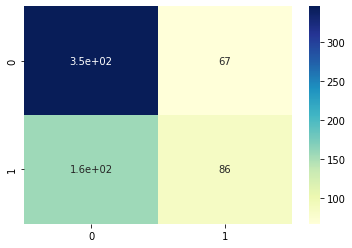

In [34]:
cmatrix=confusion_matrix(y_test,y_pred)
sns.heatmap(cmatrix,annot=True,cmap="YlGnBu")

In [35]:
#saving model
import joblib
joblib.dump(rf,"water potability prediction.pkl")

['water potability prediction.pkl']

In [36]:
load_model=joblib.load("water potability prediction.pkl")
load_model.score(x_test,y_test)

0.6585365853658537

#--- c.jowin alfred